# **Семинарска работа - Вовед во науката за податоци - 203032**

**Тема: Да се соберат податоци за цената на златото, нафтата и земниот гас за изминатите 4 години.
Потоа, да се направат мрежи на поврзаноста на цената на овие податоци.
За крај, со помош на мерки на централност (Centrality Measures) да се објаснат резултатите.**

In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
import pandas as pd


#Датасет за масло

In [230]:
oil_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/oil.xlsx')
oil_df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-07-01,70.45,82.00,69.69,81.80,81.80,6301345
1,2023-06-01,67.60,75.06,66.80,70.64,70.64,6857383
2,2023-05-01,76.66,76.69,63.64,68.09,68.09,6920662
3,2023-04-01,80.10,83.53,73.93,76.78,76.78,5497349
4,2023-03-01,76.85,80.94,64.12,75.67,75.67,7758732
5,2023-02-01,79.06,80.62,72.25,77.05,77.05,6069523
6,2022-12-01,80.40,83.34,70.08,80.26,80.26,5673808
7,2022-11-01,86.43,93.74,73.60,80.55,80.55,6418409
8,2022-10-01,81.02,93.64,80.87,86.53,86.53,5645391
9,2022-09-01,88.83,90.39,76.25,79.49,79.49,6058680


#Преименување на колоните за масло

In [231]:
oil_df.rename(columns=lambda col: col + '_Oil' if col != 'Date' else col, inplace=True)

In [232]:
oil_df


,Date,Open_Oil,High_Oil,Low_Oil,Close*_Oil,Adj Close**_Oil,Volume_Oil
0,2023-07-01,70.45,82.00,69.69,81.80,81.80,6301345
1,2023-06-01,67.60,75.06,66.80,70.64,70.64,6857383
2,2023-05-01,76.66,76.69,63.64,68.09,68.09,6920662
3,2023-04-01,80.10,83.53,73.93,76.78,76.78,5497349
4,2023-03-01,76.85,80.94,64.12,75.67,75.67,7758732
5,2023-02-01,79.06,80.62,72.25,77.05,77.05,6069523
6,2022-12-01,80.40,83.34,70.08,80.26,80.26,5673808
7,2022-11-01,86.43,93.74,73.60,80.55,80.55,6418409
8,2022-10-01,81.02,93.64,80.87,86.53,86.53,5645391
9,2022-09-01,88.83,90.39,76.25,79.49,79.49,6058680


#Датасет за злато

In [233]:
gold_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/gold.xlsx')
gold_df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-07-01,1917.9,1978.4,1903.2,1970.5,1970.5,220474
1,2023-06-01,1963.2,1983.0,1892.5,1921.1,1921.1,6383
2,2023-05-01,1980.1,2072.0,1931.0,1963.9,1963.9,215367
3,2023-04-01,1968.1,2048.6,1950.0,1990.1,1990.1,7282
4,2023-03-01,1827.1,2003.9,1811.5,1969.0,1969.0,104261
5,2023-02-01,1927.2,1959.1,1808.1,1828.9,1828.9,10398
6,2022-12-01,1768.7,1826.3,1764.3,1819.7,1819.7,9347
7,2022-11-01,1630.8,1778.9,1615.1,1746.0,1746.0,161813
8,2022-10-01,1667.2,1728.0,1622.8,1635.9,1635.9,8817
9,2022-09-01,1707.9,1728.1,1620.4,1662.4,1662.4,41586


#Преименување на колоните за злато

In [234]:
gold_df.rename(columns=lambda col: col + '_Gold' if col != 'Date' else col, inplace=True)
gold_df

,Date,Open_Gold,High_Gold,Low_Gold,Close*_Gold,Adj Close**_Gold,Volume_Gold
0,2023-07-01,1917.9,1978.4,1903.2,1970.5,1970.5,220474
1,2023-06-01,1963.2,1983.0,1892.5,1921.1,1921.1,6383
2,2023-05-01,1980.1,2072.0,1931.0,1963.9,1963.9,215367
3,2023-04-01,1968.1,2048.6,1950.0,1990.1,1990.1,7282
4,2023-03-01,1827.1,2003.9,1811.5,1969.0,1969.0,104261
5,2023-02-01,1927.2,1959.1,1808.1,1828.9,1828.9,10398
6,2022-12-01,1768.7,1826.3,1764.3,1819.7,1819.7,9347
7,2022-11-01,1630.8,1778.9,1615.1,1746.0,1746.0,161813
8,2022-10-01,1667.2,1728.0,1622.8,1635.9,1635.9,8817
9,2022-09-01,1707.9,1728.1,1620.4,1662.4,1662.4,41586


#Датасет за природен гас

In [235]:
gas_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/gas.xlsx')
gas_df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-07-01,2.729,2.793,2.463,2.634,2.634,2240758
1,2023-06-01,2.255,2.839,2.136,2.798,2.798,3206300
2,2023-05-01,2.398,2.685,2.031,2.266,2.266,2761971
3,2023-04-01,2.085,2.529,1.946,2.410,2.410,2857662
4,2023-03-01,2.769,3.027,1.944,2.216,2.216,2965411
5,2023-02-01,2.730,2.788,1.967,2.747,2.747,3316881
6,2022-12-01,6.966,7.213,4.378,4.475,4.475,2472054
7,2022-11-01,6.270,7.604,5.614,6.930,6.930,2222350
8,2022-10-01,6.800,7.188,4.750,6.355,6.355,2129579
9,2022-09-01,9.133,9.394,6.456,6.766,6.766,2065132


#Преименување на колоните за природен гас

In [236]:
gas_df.rename(columns=lambda col: col + '_Gas' if col != 'Date' else col, inplace=True)
gas_df

,Date,Open_Gas,High_Gas,Low_Gas,Close*_Gas,Adj Close**_Gas,Volume_Gas
0,2023-07-01,2.729,2.793,2.463,2.634,2.634,2240758
1,2023-06-01,2.255,2.839,2.136,2.798,2.798,3206300
2,2023-05-01,2.398,2.685,2.031,2.266,2.266,2761971
3,2023-04-01,2.085,2.529,1.946,2.410,2.410,2857662
4,2023-03-01,2.769,3.027,1.944,2.216,2.216,2965411
5,2023-02-01,2.730,2.788,1.967,2.747,2.747,3316881
6,2022-12-01,6.966,7.213,4.378,4.475,4.475,2472054
7,2022-11-01,6.270,7.604,5.614,6.930,6.930,2222350
8,2022-10-01,6.800,7.188,4.750,6.355,6.355,2129579
9,2022-09-01,9.133,9.394,6.456,6.766,6.766,2065132


#Вкупен датасет за злато, нафта, природен гас во последните 4 години

In [237]:
df = pd.merge(oil_df, gas_df, on="Date", how="inner")
df = pd.merge(df, gold_df, on="Date", how="inner")
df

,Date,Open_Oil,High_Oil,Low_Oil,Close*_Oil,Adj Close**_Oil,Volume_Oil,Open_Gas,High_Gas,Low_Gas,Close*_Gas,Adj Close**_Gas,Volume_Gas,Open_Gold,High_Gold,Low_Gold,Close*_Gold,Adj Close**_Gold,Volume_Gold
0,2023-07-01,70.45,82.00,69.69,81.80,81.80,6301345,2.729,2.793,2.463,2.634,2.634,2240758,1917.9,1978.4,1903.2,1970.5,1970.5,220474
1,2023-06-01,67.60,75.06,66.80,70.64,70.64,6857383,2.255,2.839,2.136,2.798,2.798,3206300,1963.2,1983.0,1892.5,1921.1,1921.1,6383
2,2023-05-01,76.66,76.69,63.64,68.09,68.09,6920662,2.398,2.685,2.031,2.266,2.266,2761971,1980.1,2072.0,1931.0,1963.9,1963.9,215367
3,2023-04-01,80.10,83.53,73.93,76.78,76.78,5497349,2.085,2.529,1.946,2.410,2.410,2857662,1968.1,2048.6,1950.0,1990.1,1990.1,7282
4,2023-03-01,76.85,80.94,64.12,75.67,75.67,7758732,2.769,3.027,1.944,2.216,2.216,2965411,1827.1,2003.9,1811.5,1969.0,1969.0,104261
5,2023-02-01,79.06,80.62,72.25,77.05,77.05,6069523,2.730,2.788,1.967,2.747,2.747,3316881,1927.2,1959.1,1808.1,1828.9,1828.9,10398
6,2022-12-01,80.40,83.34,70.08,80.26,80.26,5673808,6.966,7.213,4.378,4.475,4.475,2472054,1768.7,1826.3,1764.3,1819.7,1819.7,9347
7,2022-11-01,86.43,93.74,73.60,80.55,80.55,6418409,6.270,7.604,5.614,6.930,6.930,2222350,1630.8,1778.9,1615.1,1746.0,1746.0,161813
8,2022-10-01,81.02,93.64,80.87,86.53,86.53,5645391,6.800,7.188,4.750,6.355,6.355,2129579,1667.2,1728.0,1622.8,1635.9,1635.9,8817
9,2022-09-01,88.83,90.39,76.25,79.49,79.49,6058680,9.133,9.394,6.456,6.766,6.766,2065132,1707.9,1728.1,1620.4,1662.4,1662.4,41586


#Пресметување min, mix, mean, std за Масло

In [238]:
oil_df['Close*_Oil'].min()

18.84

In [239]:
oil_df['Close*_Oil'].max()

105.76

In [240]:
oil_df['Close*_Oil'].std()

21.49246721227125

In [241]:
oil_df['Close*_Oil'].mean()

68.60868421052632

#Пресметување min, mix, mean, std за злато

In [242]:
gold_df['Close*_Gold'].min()

1564.1

In [243]:
gold_df['Close*_Gold'].max()

1990.1

In [244]:
gold_df['Close*_Gold'].mean()

1815.0394736842109

In [245]:
gold_df['Close*_Gold'].std()

111.27131569732067

#Пресметување min, mix, mean, std за гас

In [246]:
gas_df['Close*_Gas'].min()

1.684

In [247]:
gas_df['Close*_Gas'].max()

9.127

In [248]:
gas_df['Close*_Gas'].std()

1.9761724805367384

In [249]:
gas_df['Close*_Gas'].mean()

3.880947368421053

#Визуелизација нафта

In [250]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


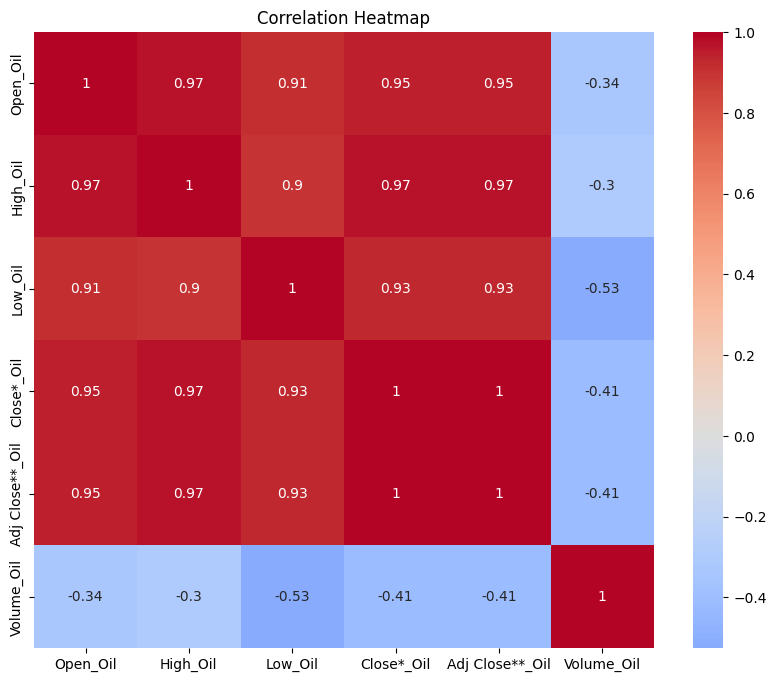

In [251]:
visualize_oil = oil_df.iloc[:, 1:]

plt.figure(figsize=(10, 8))
sns.heatmap(visualize_oil.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


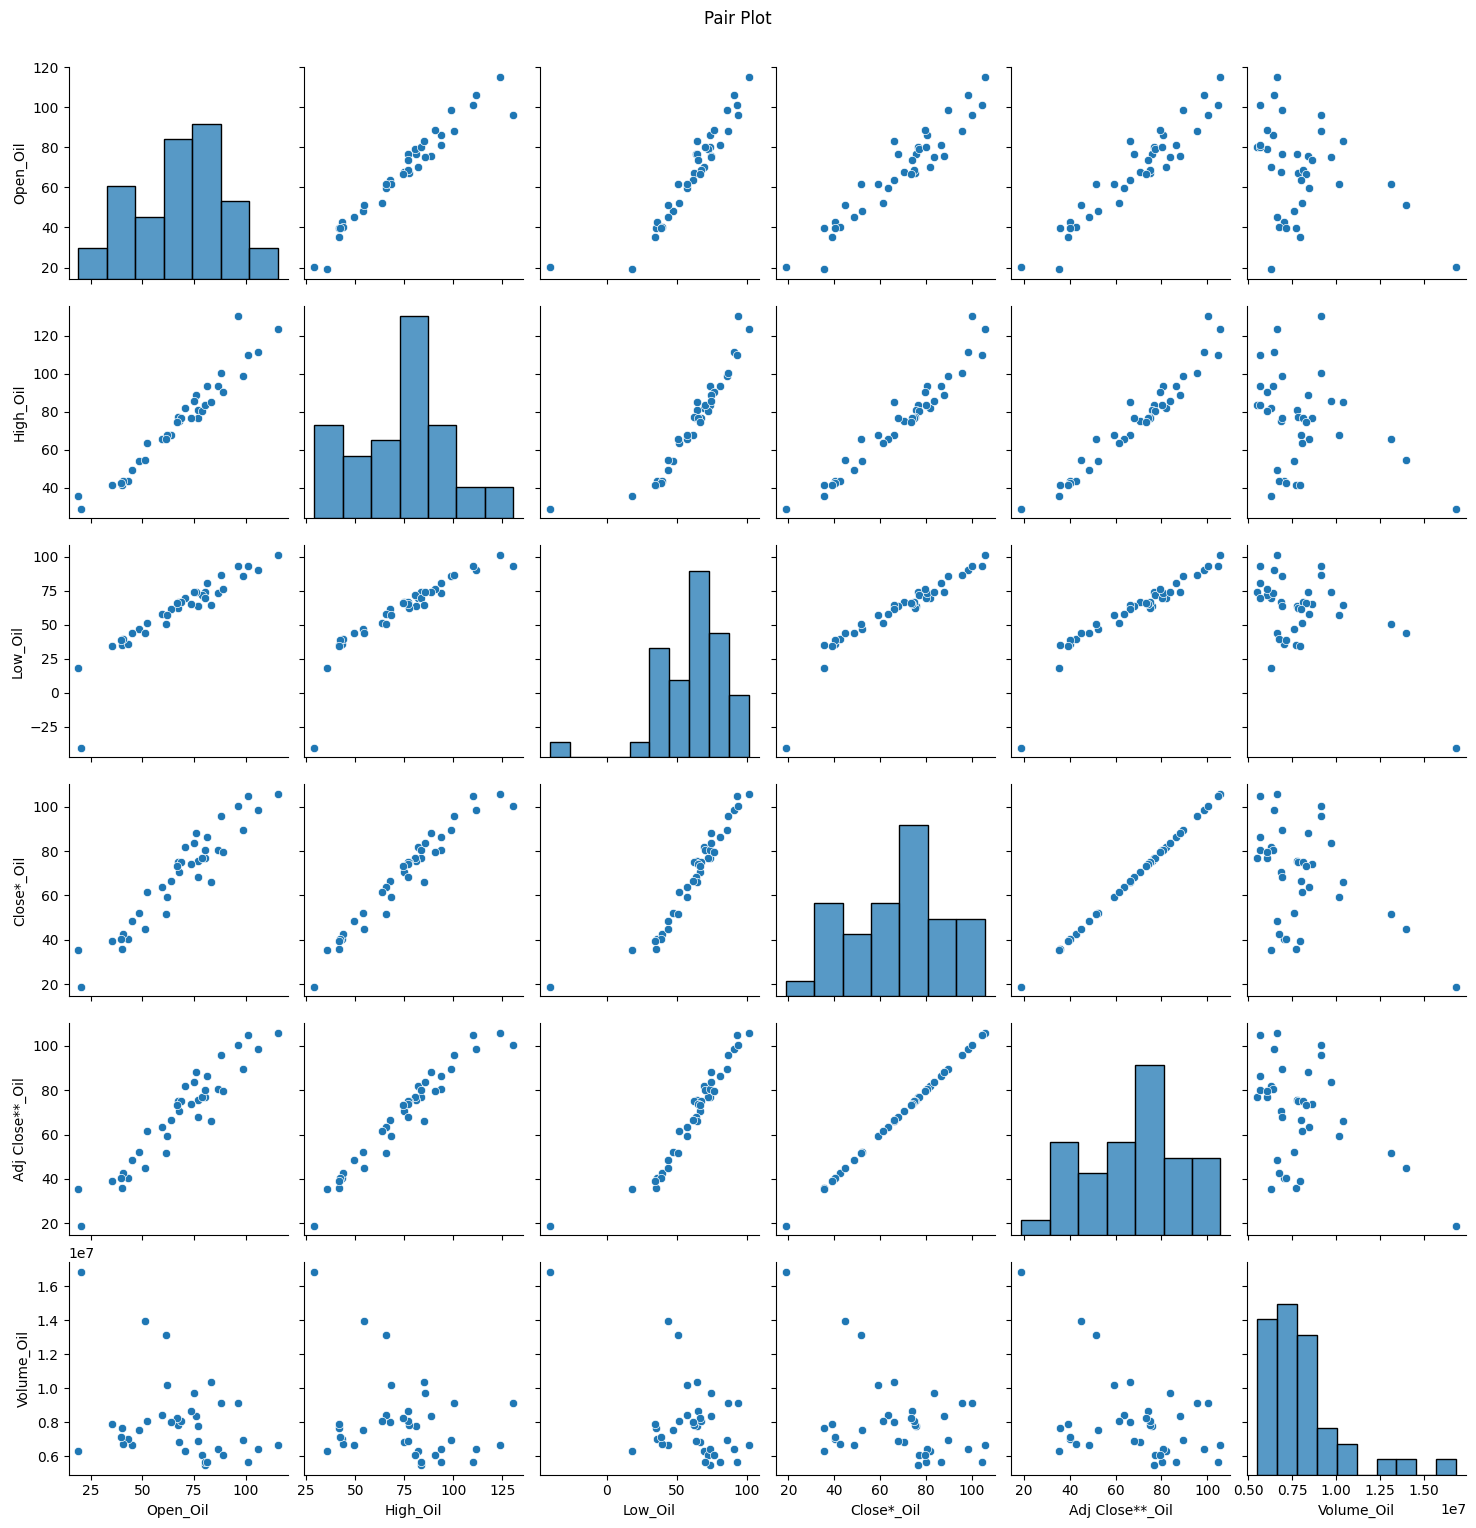

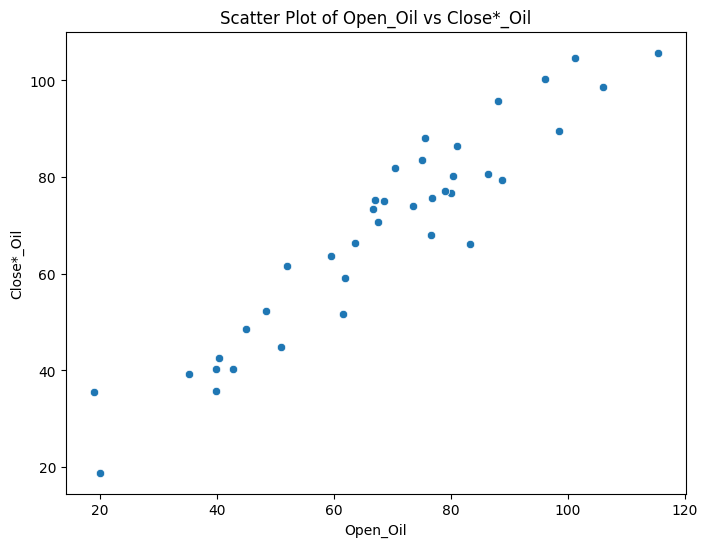

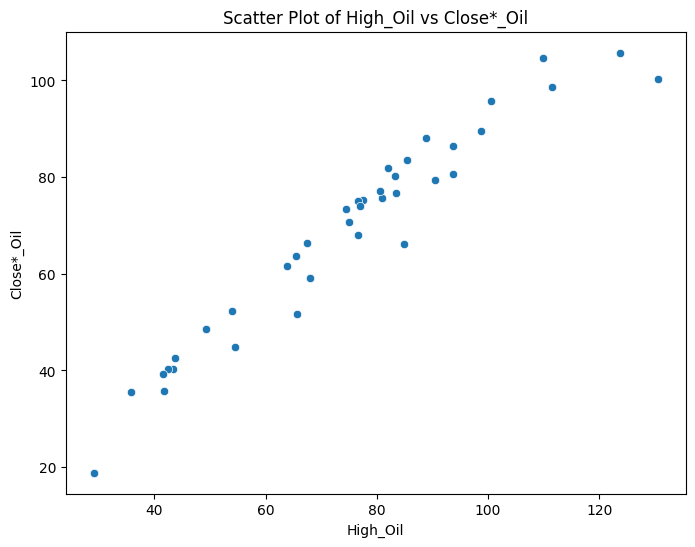

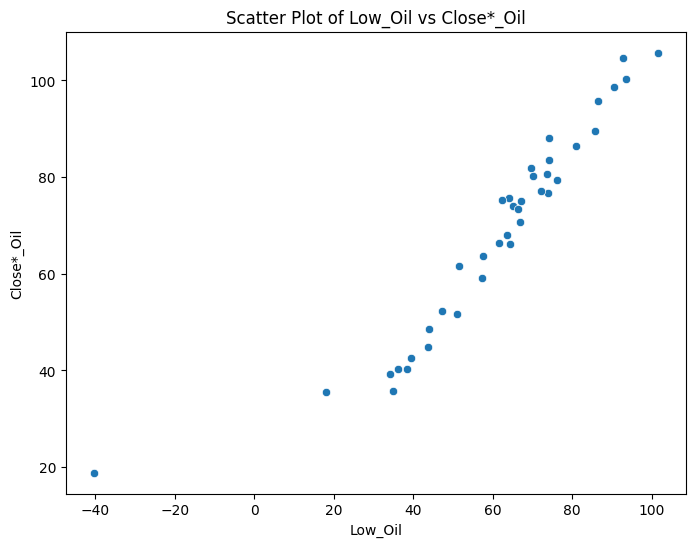

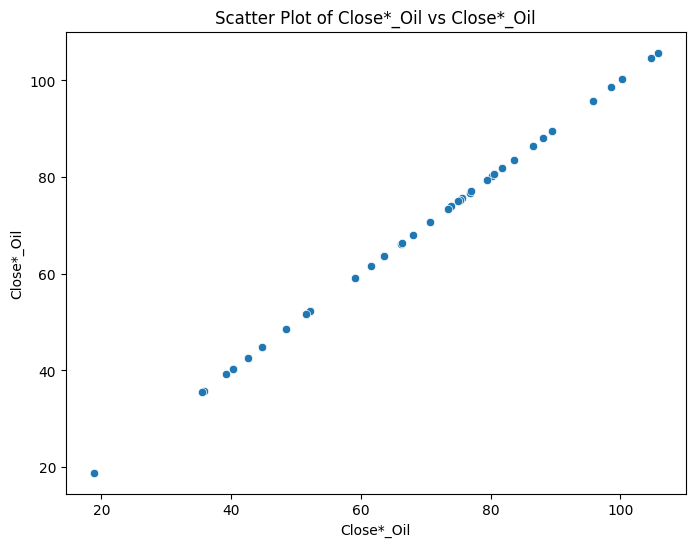

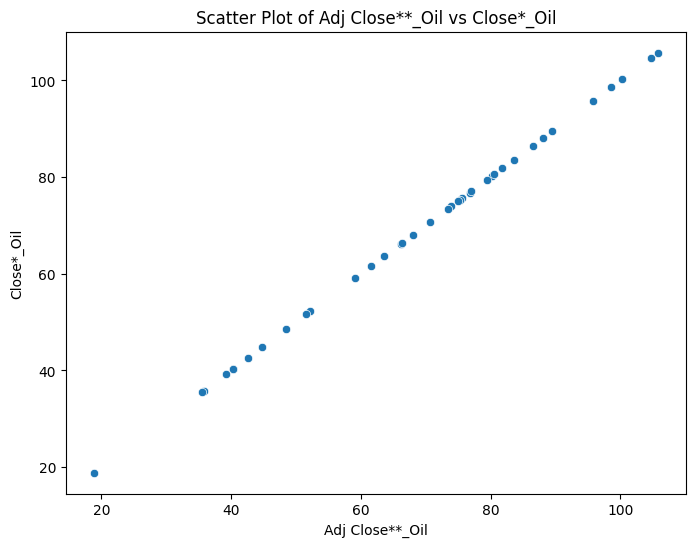

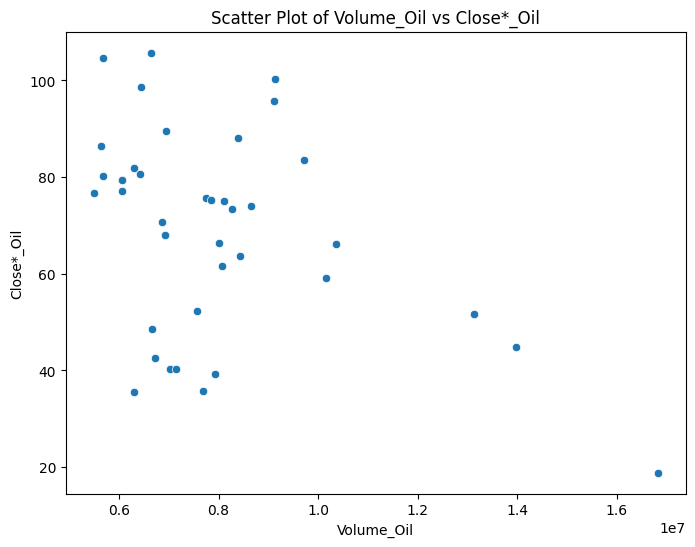

In [252]:
sns.pairplot(visualize_oil)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

for column in visualize_oil.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='Close*_Oil', data=oil_df)
    plt.title(f'Scatter Plot of {column} vs Close*_Oil')
    plt.xlabel(column)
    plt.ylabel('Close*_Oil')
    plt.show()


#Визуелизација злато

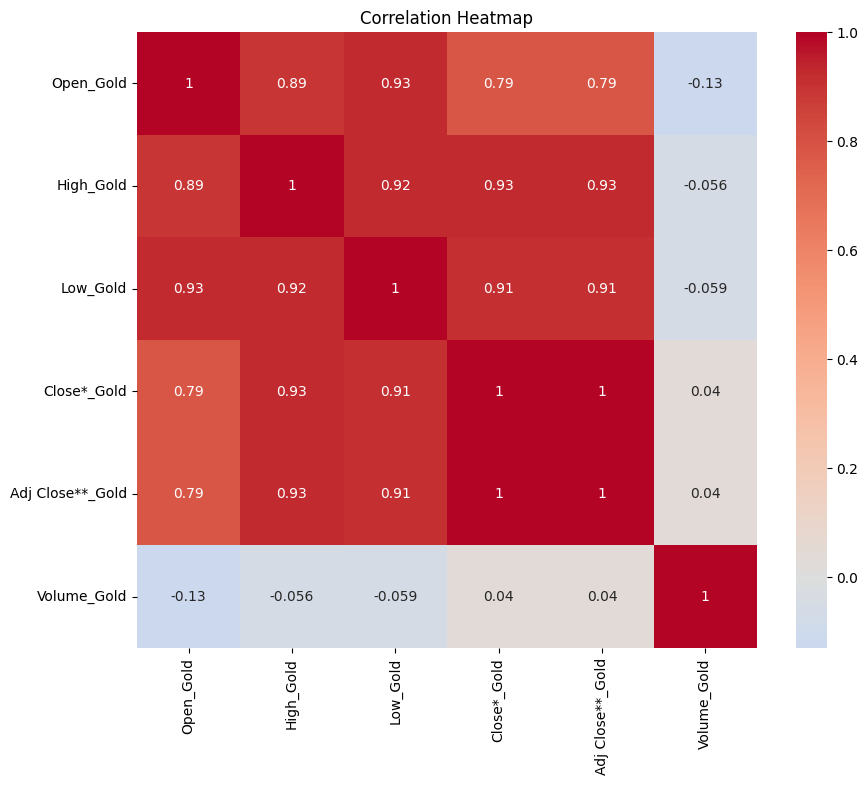

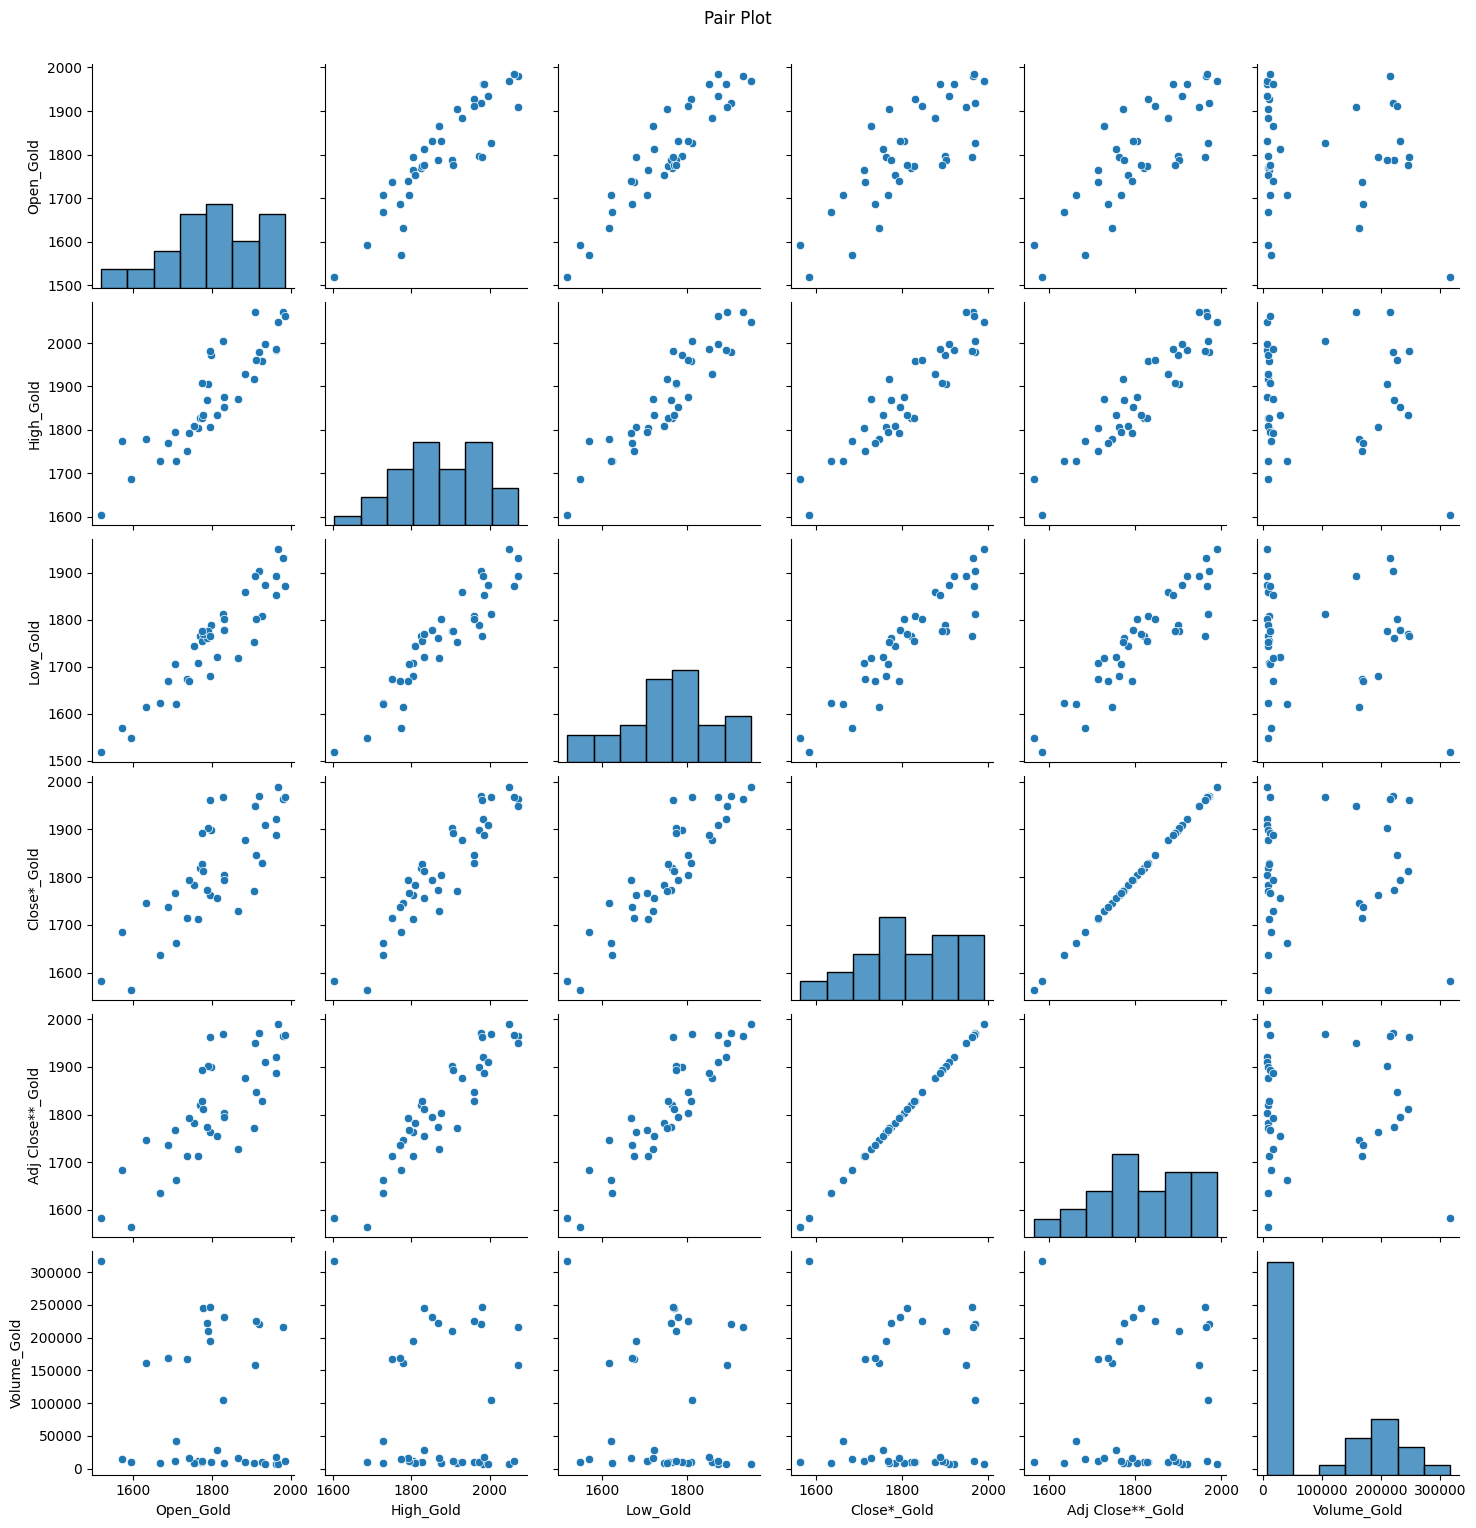

In [253]:

visualize_gold = gold_df.iloc[:, 1:]

plt.figure(figsize=(10, 8))
sns.heatmap(visualize_gold.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(visualize_gold)
plt.suptitle('Pair Plot', y=1.02)
plt.show()


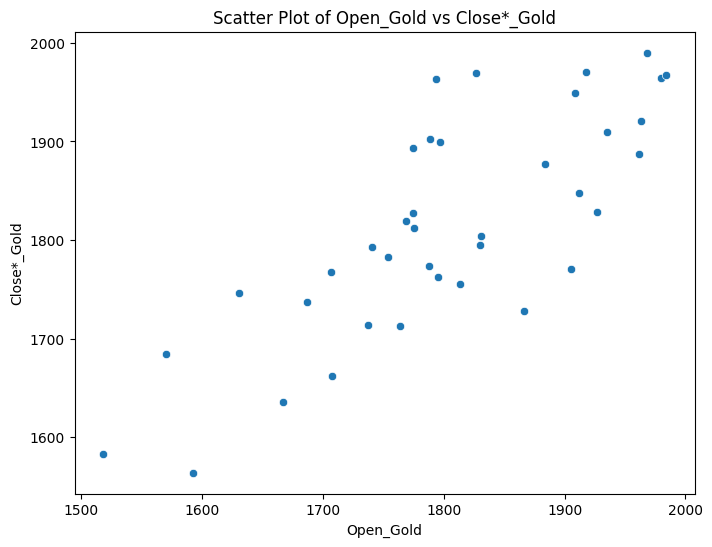

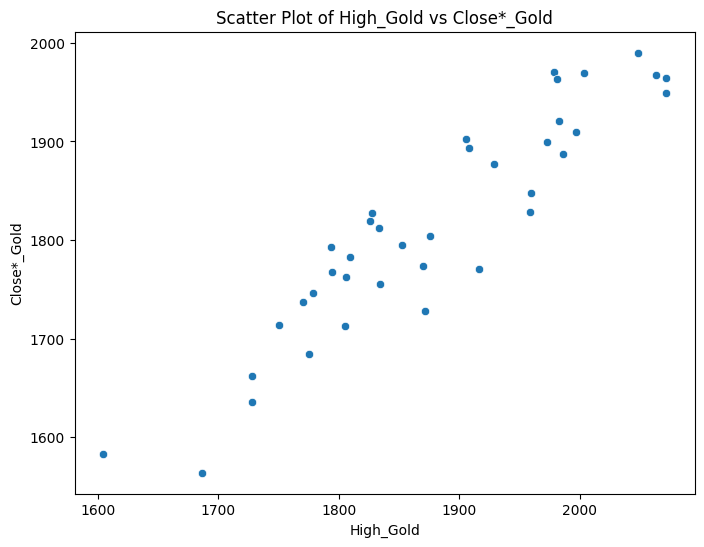

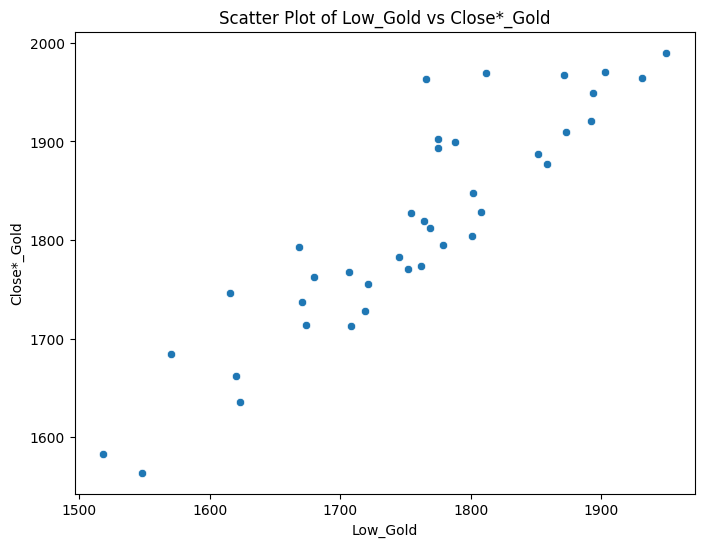

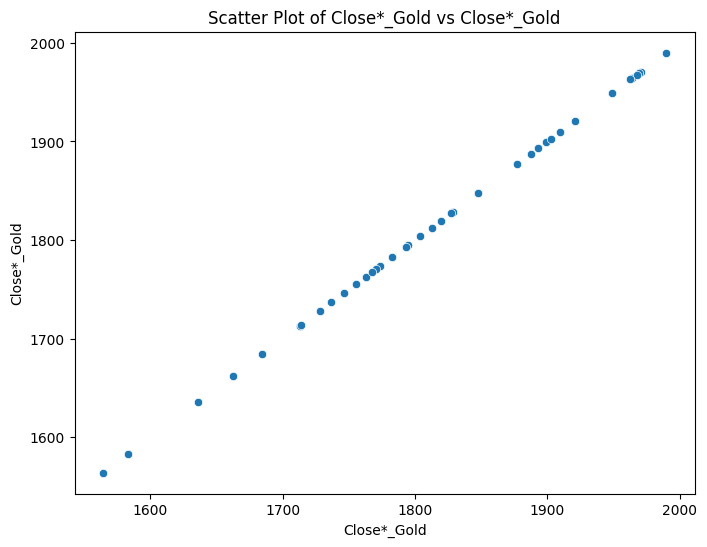

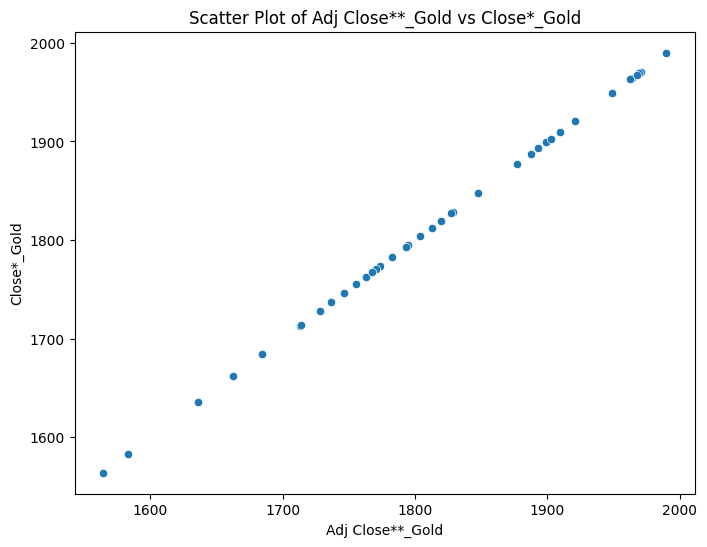

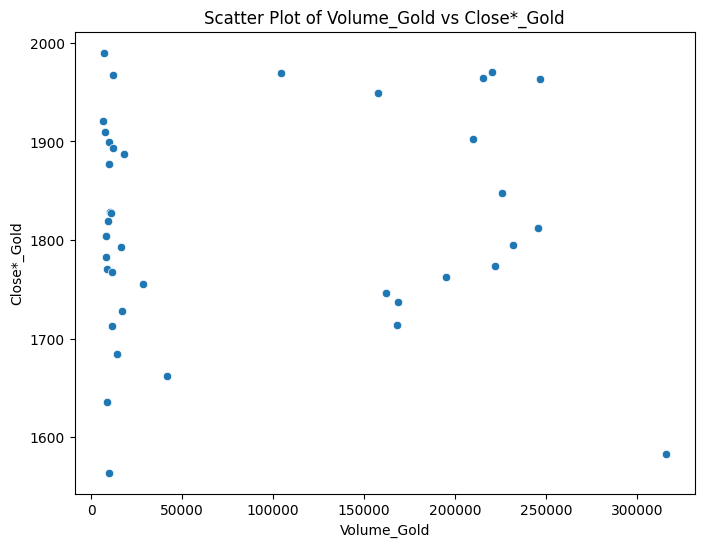

In [254]:
for column in visualize_gold.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='Close*_Gold', data=gold_df)
    plt.title(f'Scatter Plot of {column} vs Close*_Gold')
    plt.xlabel(column)
    plt.ylabel('Close*_Gold')
    plt.show()


#Визуелизација на природен гас

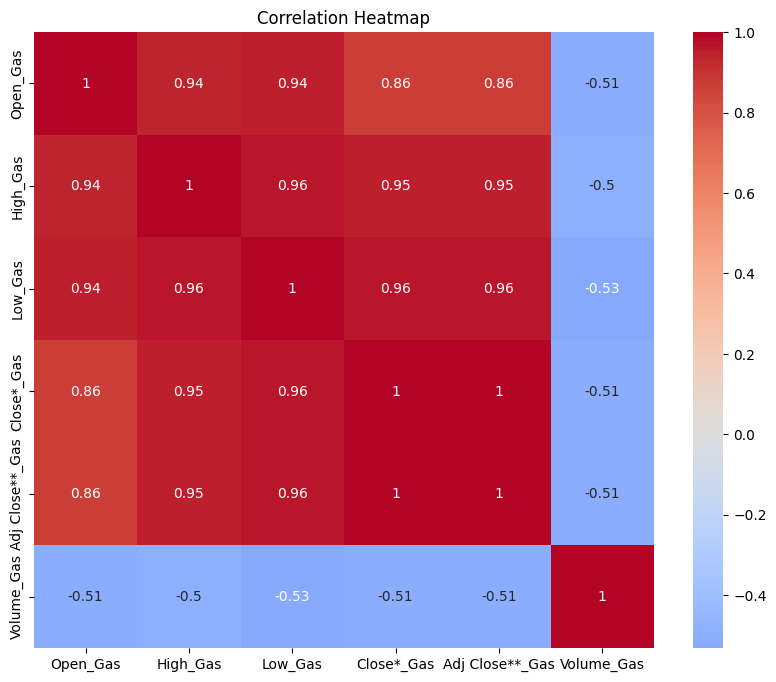

In [255]:
visualize_gas = gas_df.iloc[:, 1:]

plt.figure(figsize=(10, 8))
sns.heatmap(visualize_gas.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


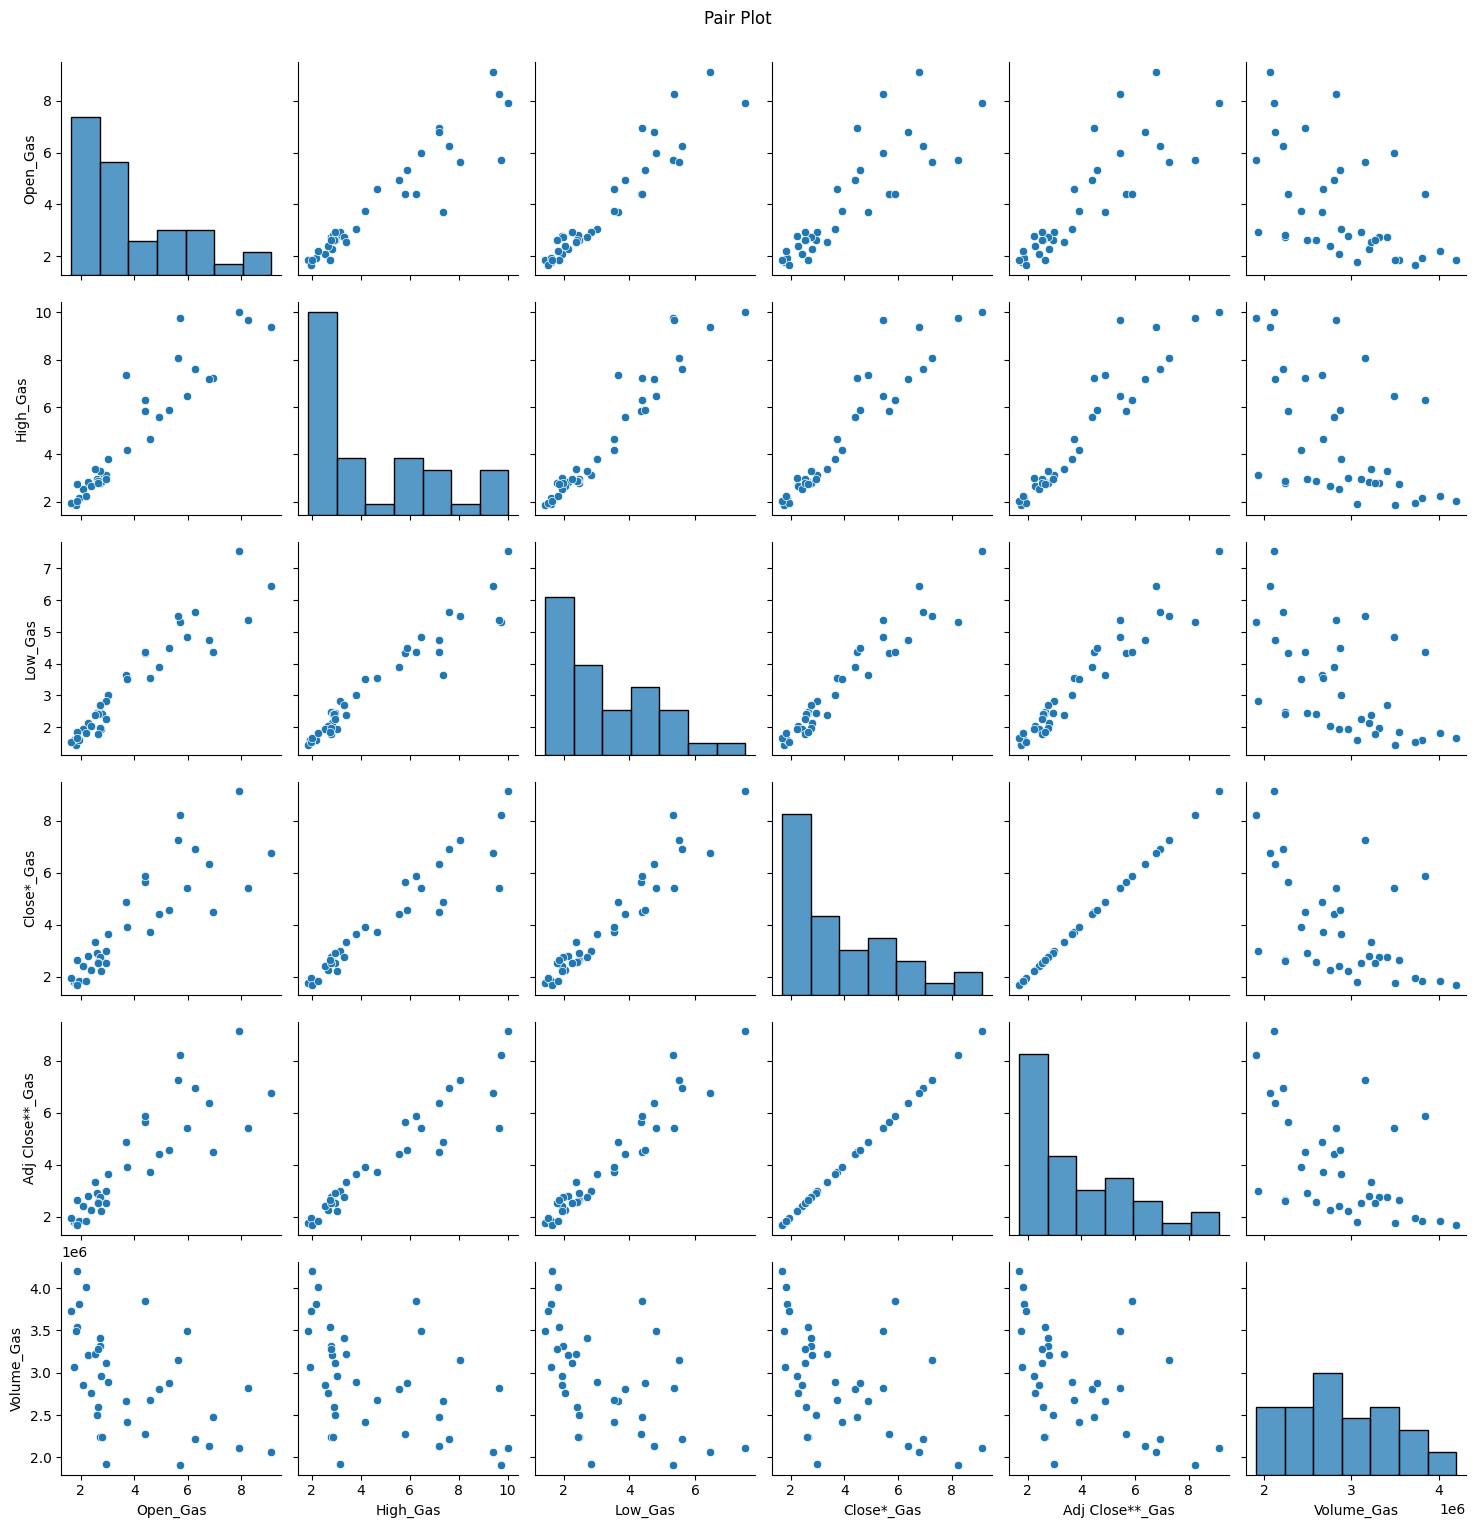

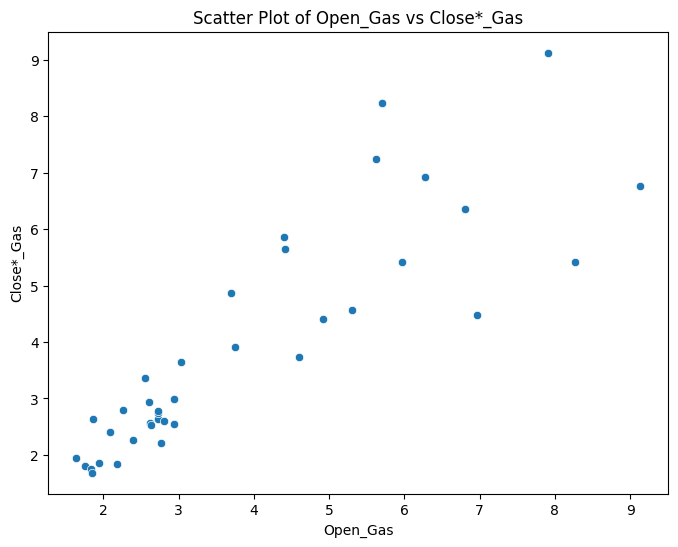

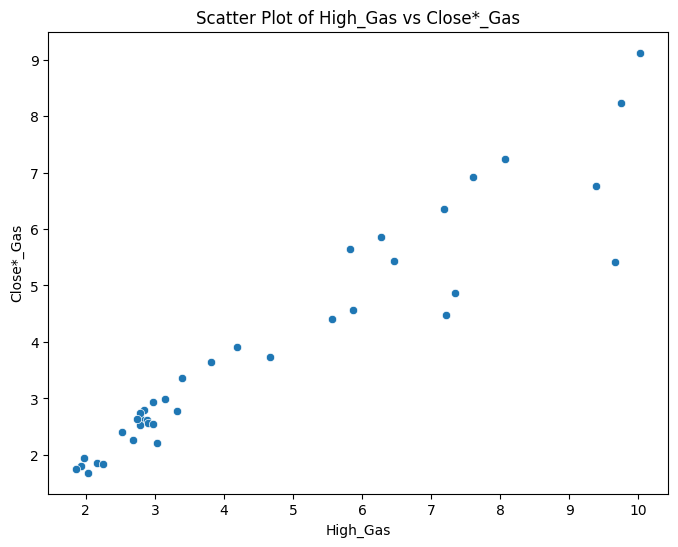

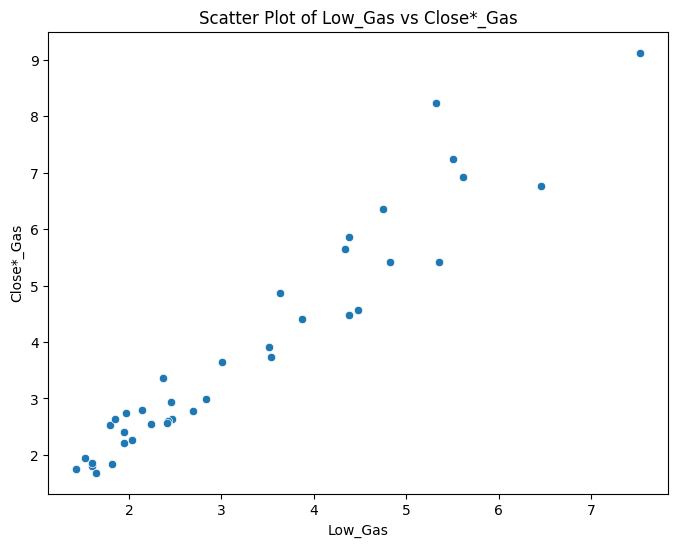

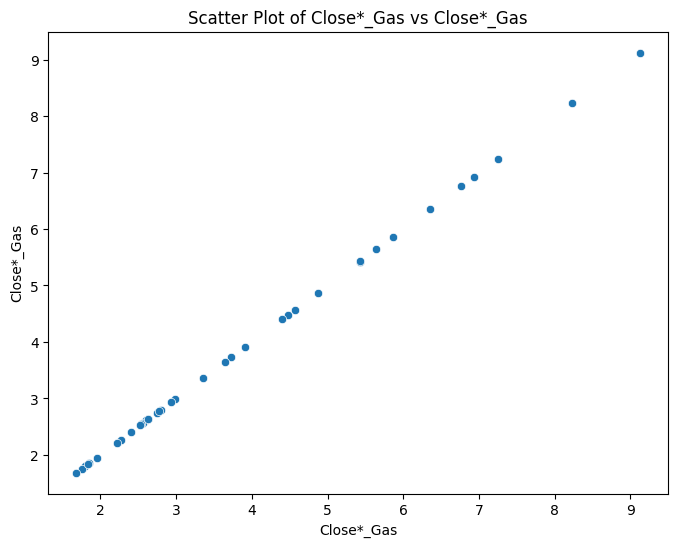

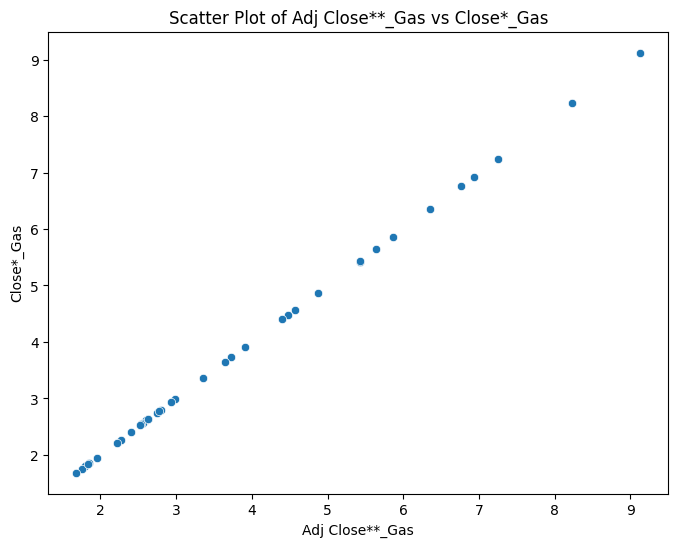

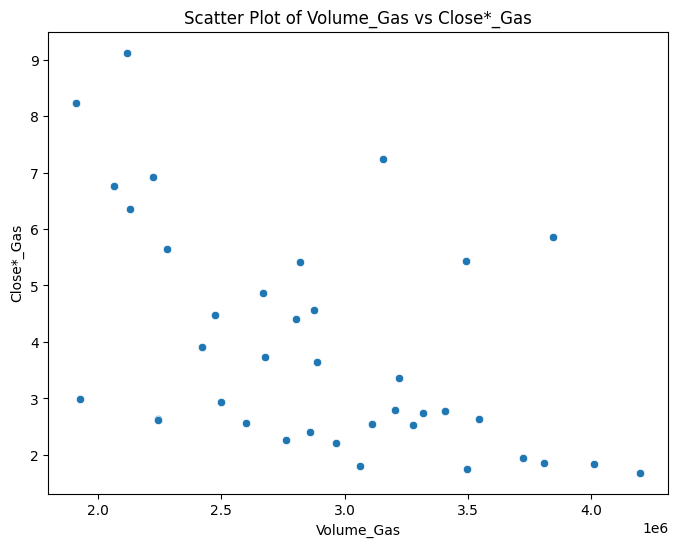

In [256]:
sns.pairplot(visualize_gas)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

for column in visualize_gas.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='Close*_Gas', data=gas_df)
    plt.title(f'Scatter Plot of {column} vs Close*_Gas')
    plt.xlabel(column)
    plt.ylabel('Close*_Gas')
    plt.show()



#Мрежи на поврзаност и формирање на график


In [257]:
import networkx as nx
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler

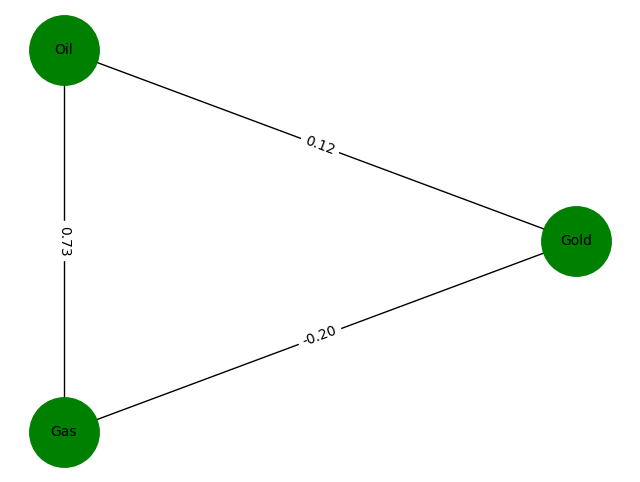

In [258]:


correlation_matrica = df[['Close*_Gold', 'Close*_Oil', 'Close*_Gas']].corr()
correlation_matrica


grafik = nx.Graph()


promenlivi = ['Gold', 'Oil', 'Gas']
for variable in promenlivi:
    grafik.add_node(variable)


for i in range(len(promenlivi)):
    for j in range(i + 1, len(promenlivi)):
        correlation = correlation_matrica.iloc[i, j]
        grafik.add_edge(promenlivi[i], promenlivi[j], weight=correlation)


pos = nx.circular_layout(grafik)

plt.figure(figsize=(8, 6))

nx.draw_networkx_nodes(grafik, pos, node_color='green', node_size=2500)


edges = grafik.edges(data=True)
edge_labels = {(edge[0], edge[1]): f"{edge[2]['weight']:.2f}" for edge in edges}
nx.draw_networkx_edges(grafik, pos)
nx.draw_networkx_edge_labels(grafik, pos, edge_labels=edge_labels)

nx.draw_networkx_labels(grafik, pos, font_size=10, font_color='black')

plt.axis('off')
plt.show()


<ipython-input-259-5f1353a86caf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close*_Gold'] = df['Close*_Gold'] * 1889


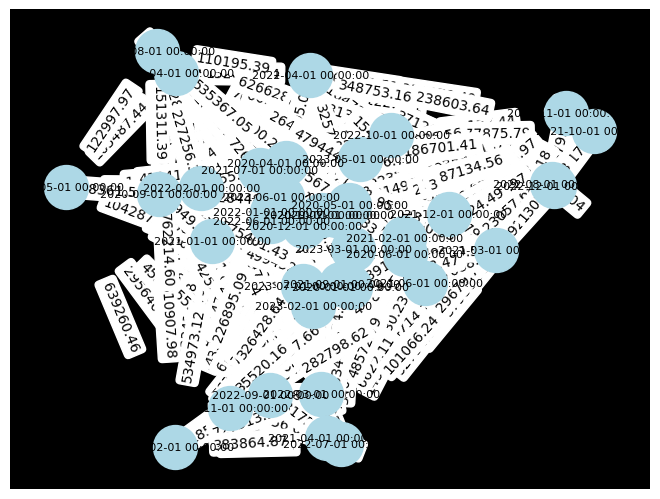

In [259]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df= df[['Date', 'Close*_Oil', 'Close*_Gas', 'Close*_Gold']]
df['Close*_Gold'] = df['Close*_Gold'] * 1889

Graf = nx.Graph()

Graf.add_nodes_from(df['Date'])

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        date1, date2 = df.loc[i, 'Date'], df.loc[j, 'Date']
        price_diff = abs(df.loc[i, 'Close*_Gold'] - df.loc[j, 'Close*_Gold']) + \
                     abs(df.loc[i, 'Close*_Oil'] - df.loc[j, 'Close*_Oil']) + \
                     abs(df.loc[i, 'Close*_Gas'] - df.loc[j, 'Close*_Gas'])
        Graf.add_edge(date1, date2, weight=price_diff)

pos = nx.spring_layout(Graf, seed=42)
edges = Graf.edges()
weights = [Graf[u][v]['weight'] for u, v in edges]
nx.draw(Graf, pos, with_labels=True, font_size=8, node_size=1000, node_color='lightblue', width=weights)
nx.draw_networkx_edge_labels(Graf, pos, edge_labels={(u, v): f'{w:.2f}' for (u, v, w) in Graf.edges(data='weight')})
plt.show()


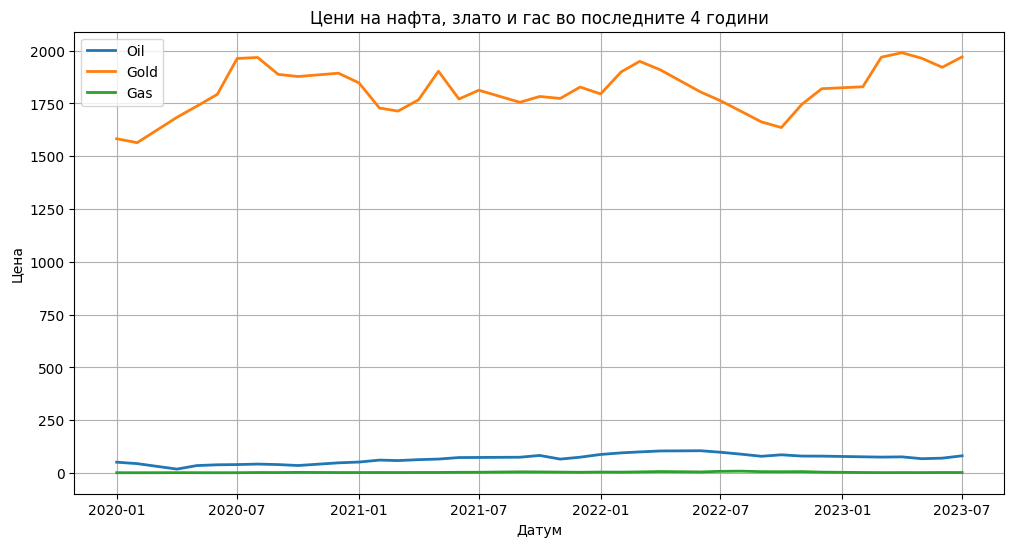

In [260]:
import pandas as pd
import matplotlib.pyplot as plt




oil_df['Date'] = pd.to_datetime(oil_df['Date'])
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
gas_df['Date'] = pd.to_datetime(gas_df['Date'])

plt.figure(figsize=(12, 6))

plt.plot(oil_df['Date'], oil_df['Close*_Oil'], label='Oil', linewidth=2)
plt.plot(gold_df['Date'], gold_df['Close*_Gold'], label='Gold', linewidth=2)
plt.plot(gas_df['Date'], gas_df['Close*_Gas'], label='Gas', linewidth=2)

plt.title('Цени на нафта, злато и гас во последните 4 години')
plt.xlabel('Датум')
plt.ylabel('Цена')
plt.legend()
plt.grid()

plt.show()


#Centrality measures

In [261]:
degree_centrality = nx.degree_centrality(grafik)
closeness_centrality = nx.closeness_centrality(grafik)
betweenness_centrality = nx.betweenness_centrality(grafik)
eigenvector_centrality = nx.eigenvector_centrality(grafik)

# Принтање на мерките на централност за секој јазол (променлива)
for node in promenlivi:
    print(f"Node: {node}")
    print(f"Degree Centrality: {degree_centrality[node]}")
    print(f"Closeness Centrality: {closeness_centrality[node]}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]}")
    print(f"Eigenvector Centrality: {eigenvector_centrality[node]}\n")

Node: Gold
Degree Centrality: 1.0
Closeness Centrality: 1.0
Betweenness Centrality: 0.0
Eigenvector Centrality: 0.5773502691896258

Node: Oil
Degree Centrality: 1.0
Closeness Centrality: 1.0
Betweenness Centrality: 0.0
Eigenvector Centrality: 0.5773502691896258

Node: Gas
Degree Centrality: 1.0
Closeness Centrality: 1.0
Betweenness Centrality: 0.0
Eigenvector Centrality: 0.5773502691896258



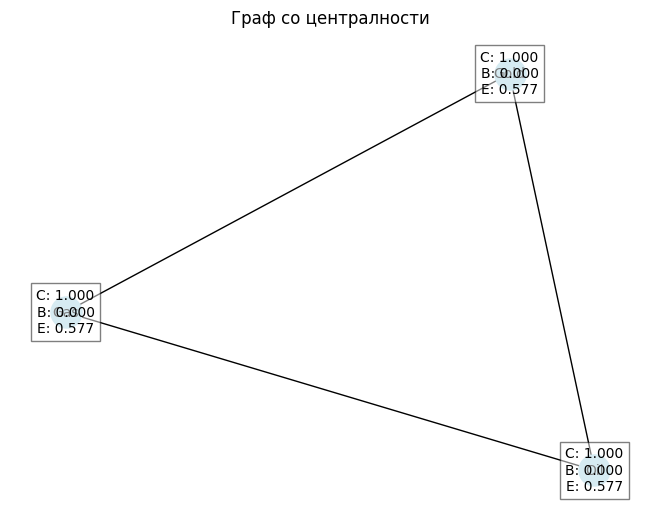

In [262]:
import networkx as nx
import matplotlib.pyplot as plt


# Визуелизација на графот
pos = nx.spring_layout(graph)
nx.draw(grafik, pos, with_labels=True, node_size=500, font_size=10, node_color='lightblue')
for node in grafik.nodes():
    centrality_text = f"C: {closeness_centrality[node]:.3f}\nB: {betweenness_centrality[node]:.3f}\nE: {eigenvector_centrality[node]:.3f}"
    plt.text(pos[node][0], pos[node][1], centrality_text, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

plt.title("Граф со централности")
plt.show()
